# Project: Medical Appointment No Shows Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I used **No-show appointments** data set.

> Sometimes a person makes a doctor appointment, receives all the instructions and no-show. this data set consists of 110527 row and 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.

>**Question**: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [10]:
#Read data set and show the first 5 rows

pf=pd.read_csv('medicalAppointment.csv')
pf.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#Show the number of rows and columns 

pf.shape

(110527, 14)

In [7]:
#Show information about each column

pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


    1- We notice that there are no missing values 
     
    2- We can drop columns that we won't use like PatientId and AppointmentID
     

In [14]:
#Desribe columns that is not numeric

pf.describe(include=['O'])

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [17]:
#Show all unique values in the column 'No-show'

pf['No-show'].unique()

array(['No', 'Yes'], dtype=object)

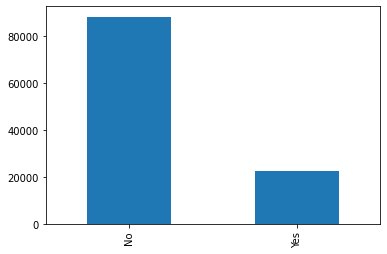

In [34]:
#Visualize the number of patients who attended and who didn't

pf['No-show'].value_counts().plot(kind='bar');

    1- Most of Patients in this data set attended their appointments and about 20000 didn't attend 
      
    2- most of the Patients are females 

In [11]:
#Drop two columns we won't use

pf.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [10]:
#Show the first 5 rows after dropping the two columns

pf.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#Describe the numeric columns 

pf.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [28]:
#Show all unique values in the column 'Handcap'

pf['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

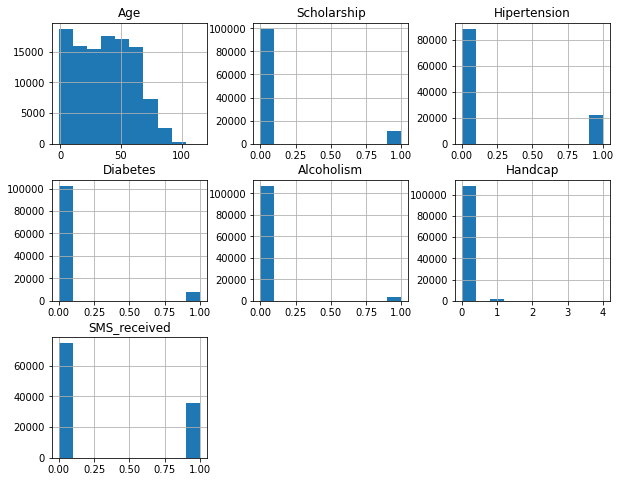

In [11]:
#Draw Histogram for all numeric columns 

pf.hist(figsize=(10,8));

Most of them have no scholarship, no Hipertension, no Diabetes, no Alcoholism, no Handcap and didn't recieve SMS

Their ages are often between 18 and 55


### Data Cleaning 

> Data set doesn't require too much cleaning because there are no missing values but the minimum age is -1 which is not logical so we will check it:

In [26]:
#Show rows with age < 0

pf[pf['Age']<0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
#Drop rows with age < 0

pf.drop(pf[pf['Age'] < 0 ].index, inplace = True)

We dropped a row with age = -1

<a id='eda'></a>
## Exploratory Data Analysis

In [14]:
#Function to group some column 'col' by 'No-show' and calculate the percentage of who attended and who didn't

def getPercentage(col):
    print(pd.crosstab(col,pf["No-show"]).apply(lambda r: r/r.sum(), axis=1))

In [32]:
#Function to visualize relation between one feature 'x' and attendence 

def showUp_noShow_visualize(x,labelx,lbaely,title):
    h=x[pf["No-show"]=='No'].hist(alpha=.5,label='Show-Up')
    h=x[pf["No-show"]=='Yes'].hist(alpha=.5,label='No-Show')
    h.set_xlabel(labelx)
    h.set_ylabel(lbaely)
    plt.title(title)
    plt.legend();

### Question 1: Is there a relation between Gender and Attendece?

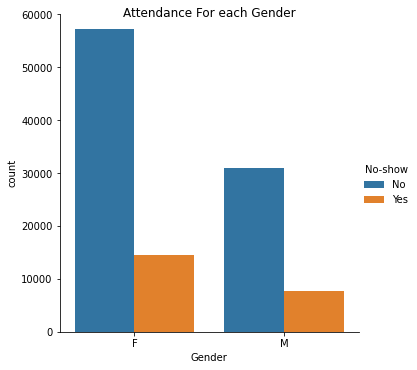

In [24]:
#Visualize number of patient to show different genders attendence

g = sns.catplot(x="Gender", data=pf,kind="count",hue="No-show")
g.fig.suptitle('Attendance For each Gender');

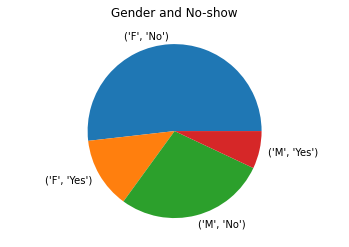

In [66]:
#Show pie chart for genders and attendence

counts = pf['No-show'].groupby(pf.Gender).value_counts()
plt.axis('equal');
plt.pie(counts, labels=counts.index);
plt.title('Gender and No-show');
plt.show();

The two charts above show that Female patients are more than males

In [15]:
#Get the percentage of attendance for each gender

getPercentage(pf["Gender"])

No-show        No       Yes
Gender                     
F        0.796851  0.203149
M        0.800321  0.199679


We can find that 79.68% from females attend their appoint ment while 20.31% don't

And 80.03% from males attend while 19.97% don't

As the results are close to each other, we can say that there is no correlation between gender and attendence.

### Question 2: Is there a relation between Age and Attendece?

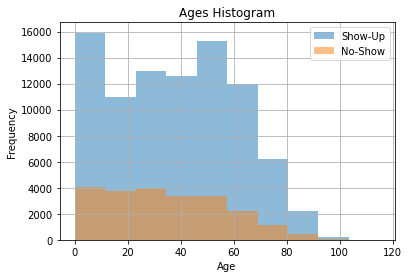

In [33]:
#Visualize relation between ages of who attended and ages of who didn't

showUp_noShow_visualize(pf.Age,'Age','Frequency','Ages Histogram')

No obvious correlation between Age and attendence 

### Question 3: Is there a relation between Alcoholism and Attendece?

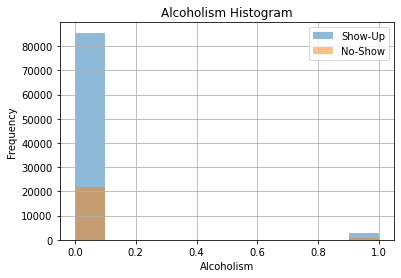

In [34]:
#Visualize relation between who have alcoholism attendance and who don't have attendance 

showUp_noShow_visualize(pf.Alcoholism,'Alcoholism','Frequency','Alcoholism Histogram')


It seems that number of who don't have alcoholism are more than others and it doesn't seem to affect the attendence

In [16]:
#Get the percentage of attendance for who have Alcoholism and who don't

getPercentage(pf["Alcoholism"])

No-show           No       Yes
Alcoholism                    
0           0.798052  0.201948
1           0.798512  0.201488


As the results are too close to each other, we can say that there is no correlation between Alcoholism and attendence.

### Question 4: Is there a relation between SMS_received and Attendece?

In [17]:
#Get the percentage of attendance for who recieved SMs and who didn't

getPercentage(pf["SMS_received"])

No-show             No       Yes
SMS_received                    
0             0.832965  0.167035
1             0.724255  0.275745


83.29% from pacients who recieve SMS messages attend  

While only 72.42% from pacients who don't recieve SMS messages attend  

We can notice that the atttendence increases by 11% If they recieved SMS

<a id='conclusions'></a>
## Conclusions

  ### limitations:
- There are no strong relation between patients attendece to their appointments and most of the features as they have a very small effect close to 1% or 2% (SMS_recieved feature is an exception).


- Almost all the features has only two values (ones and zeros) which caused limitations in the visualizations types.